In [1]:
# Importing Liabraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Importing dataset

ds = pd.read_csv("cleaned_data.csv")
ds = ds.loc[:, ~ds.columns.str.contains('^Unnamed')]                # removing unnamed column

In [9]:
ds.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [21]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [33]:
# Splitting dataset into Independent and Dependent variable

X = ds[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
y = ds[['diagnosis']]

In [35]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])

In [37]:
# Splitting the dataset into the Training set and Testing set(80% Train and 20% test)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [39]:
# applying the Logistic Regression model on the Training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [41]:
# Predict for myinput
input_data = [8.196, 16.84, 51.71, 201.9, 0.086, 0.05943, 0.01588, 0.005917, 0.1769, 0.06503, 0.1563, 0.9567, 1.094, 8.205, 0.008968, 0.01646, 0.01588, 0.005917, 0.02574, 0.002582, 8.964, 21.96, 57.26, 242.2, 0.1297, 0.1357, 0.0688, 0.02564, 0.3105, 0.07409]
myinput = pd.DataFrame(sc.transform([input_data]), columns =  ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 
    'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 
    'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
    'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 
    'symmetry_worst', 'fractal_dimension_worst'])
classifier.predict(myinput)


# For above myinput data the logistic regression predicts B(Non-Cancerous)

array(['B'], dtype=object)

In [43]:
# Cheaking Accuracy of logistic regresssion model

from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the logistic regression model: {accuracy * 100:.2f}%")

Accuracy of the logistic regression model: 100.00%


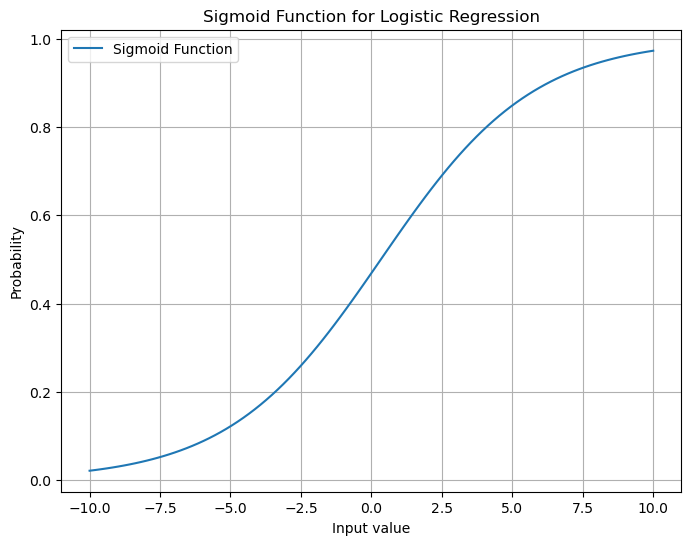

In [45]:
# Plotting Sigmoid function

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Assuming your classifier is a logistic regression model
# We need the coefficients (weights) and the intercept from the model
weights = classifier.coef_[0]
intercept = classifier.intercept_[0]

# Generate a range of values (e.g., values from -10 to 10 for the linear combination of features)
X_range = np.linspace(-10, 10, 100)

# Calculate the sigmoid of each value
sigmoid = 1 / (1 + np.exp(-(weights[0] * X_range + intercept)))

# Plot the sigmoid curve
plt.figure(figsize=(8, 6))
plt.plot(X_range, sigmoid, label='Sigmoid Function')
plt.title('Sigmoid Function for Logistic Regression')
plt.xlabel('Input value')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()